What has been done:
1. Data organized
2. Exclusion criteria for sessions pulled into a single data frame


What needs to be done:
(Goals overall)
1. Confirm that above (2) is done correctly  For each animal (for loop)
2. Set exclusion criteria / data selection block For each session:
3. Read in full psychometric curve (however, contrast varies between session? Find a way to harmonize data) For each animal (n = 1, … , n = 1 analysis)
4. Get central values and error values for full curve for each animal, across sessions
5. Average across animals to produce group level psychometric curves?, and error across animals. (Probably actually do this with parameters, not actual curves)
6. take the overall df then segerate by animal, then pull out pysch curve for each animal 


What we did 220106:
1. solved appending laserpower issue using .unique
2. solved trial counting numbers by not looking at block1

What we (paul) did 220217:
1. used miscD to get data out of mworks data
2. implanted proper sanity check on data

    a. laser power check 
    
    b. laser color check
    
    c. laser A or B check
    
3. restructured query 

    a. changed from dictionary to dataframe
    
    b. changed data path
    
What we (paul) did 220223:
1. seperated out blocks the found every contrast for every block
2. graphed accuarcy vs contrast per condition 

issue to be solved from session:
1. need to figure out how to figure out if the laser is on (not definitive if triallaser in non-zero or block2 is on)
   - (possible solution: pull out a day with and without laser on and hop to find soemthing that can segregate the conditiions)
   - (another idea: use python to load in both session then use a diff fucntion to look for differences between the days around the laser condition 
   - or use matlab to load each file in indepedently then check manually)
   -solved see day 220217
   
after looking at matlab/python
- probably just have to check that the laser power is non-zero, laserAorB is set, and lasercolor is set. 
- solved

what to do next (based on 220218 meeting with jon)
- spend time sketching out final goals 
- pull all good sessions and days in a new df 
- then pull out seperate matrix of df with relevant info (psych curve) base on good days
- also need laser on and off
- also dont really need to look at anything other than hit rate per contrast
   
   
extra things to do
- generate error then post issue on git 
- add thresh to final df

In [ ]:
import pytoolsMH as ptMH
import mworksbehavior
import mworksbehavior.imaging
import mworksbehavior as mwb
import numpy as np
import os
import glob as glob
import matplotlib.pyplot as plt
import sys
from mworksbehavior import mat_io
from mworksbehavior import psychfun
import pandas as pd
import scipy

sys.path.append('../src')

# data location
serverroot = os.path.expanduser("~/data-local")
dirname = "Striatum animals"
datafile = os.path.join(serverroot, dirname)

#checks all directories and subdirectories for .mat files
block = 0
empty = []
mat = []
param = {'filename':[], 'num_success':[], 'num_ignore':[], 'num_early':[], 'tTrialLaserPowerMw':[], ' accuracy':[]  }
for subdir, dirs, files in os.walk(datafile):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith(".mat"):
            #print(filepath)
            try: 
                mat = mat_io.matBehavFile(fName=np.str(filepath))
            except: 
                empty.append(np.str(filepath))
            matDF = mat.df
            #if matDF[matDF['tBlock2TrialNumber'] == 0]:
            #trials_block1 = matDF[matDF['tBlock2TrialNumber']==block]
            #trials_block1.index = range(len(trials_block1.index))
            accuracy = np.zeros((matDF['tStimContrast'].unique().shape[0],))
            print(accuracy)
            count = 0
            for c in np.sort(matDF['tStimContrast'].unique()):
                num_success = np.sum(matDF['trialOutcomeCell']=='success')
                num_ignore = np.sum(matDF['trialOutcomeCell']=='ignore')
                num_early = np.sum(matDF['trialOutcomeCell']=='early')
                laser_power = (matDF[matDF['tStimContrast']==c]['tTrialLaserPowerMw']).unique()
                accuracy[count,] = num_success/(num_success+num_ignore)
                count = count+1
                param['filename'].append(filepath[66:])
                #can chop up which piece of filepath you want with regex
                param['num_success'].append(num_success)
                param['num_ignore'].append(num_ignore)
                param['tTrialLaserPowerMw'].append(laser_power)
                param[' accuracy'].append(accuracy)
                param['num_early'].append(num_early)
        break
#pull out laser data
#what is necessary to generate psych curve 
#need parameters to be able to sort and collapse 
#column for animal, laser power, early, hits

In [ ]:
df = pd.DataFrame(param)

In [ ]:
df

In [ ]:
for c in np.sort(matDF['tStimContrast'].unique()):
    print(np.sum(matDF['trialOutcomeCell']=='success'))
    print(np.sum(matDF['trialOutcomeCell']=='ignore'))
    print(np.sum(matDF['trialOutcomeCell']=='early'))

In [ ]:
print(matDF.columns)
#df['filename'][18]

In [ ]:
print(matDF['tBlock2TrialNumber'])

In [ ]:
print(matDF['trialOutcomeCell'].unique())

In [ ]:
file = '/Users/wilsonjok/data-local/Striatum animals/2867/mat files/data2-i2867-211022.mat'


In [ ]:
mat = mat_io.matBehavFile(fName=np.str(file))
matDF = mat.df

savedEvents = matDF['savedEvents'] # list of saved events
eventCodecs = pd.DataFrame(mat.miscDL[0]['eventCodecs'])

In [ ]:
print(list(matDF))

In [ ]:
matDF['trialOutcomeCell'].unique()

In [ ]:
matDF['tStimContrast'].unique()

In [ ]:
matDF['tTrialLaserPowerMw'].unique()

In [ ]:
# segregate out different blocks
trials_block1 = matDF[matDF['tBlock2TrialNumber']==0]
trials_block1.index = range(len(trials_block1.index))

In [ ]:
# calculate accuracy across contrasts in block1
accuracy_block1 = np.zeros((matDF['tStimContrast'].unique().shape[0],))
count = 0
for c in np.sort(trials_block1['tStimContrast'].unique()):
    print(c)
    num_success = np.sum(trials_block1[trials_block1['tStimContrast']==c]['trialOutcomeCell']=='success')
    num_ignore = np.sum(trials_block1[trials_block1['tStimContrast']==c]['trialOutcomeCell']=='ignore')
    laser_power = np.sum(trials_block1[trials_block1['tStimContrast']==c]['tTrialLaserPowerMw'])
    accuracy_block1[count,] = num_success/(num_success+num_ignore)
    count = count+1

In [ ]:
num_success, num_ignore, laser_power

In [ ]:
# day with laser off the correct way
dirpath_one = "/Users/wilsonjok/data-local/Striatum animals/2957/mat files/data2-i2957-210820.mat"
mat_one = mat_io.matBehavFile(fName=np.str(dirpath_one))
mat_one_DF = mat.df
mat_compare_one = mat_one_DF.columns
dirpath_two = "/Users/wilsonjok/data-local/Striatum animals/2957/mat files/data2-i2957-210813.mat"
mat_two = mat_io.matBehavFile(fName=np.str(dirpath_two))
mat_two_DF = mat.df
mat_compare_two = mat_two_DF.columns

mat_compare_one.difference(mat_compare_two)

In [ ]:
mat_one_DF

In [ ]:
to_match = pd.Series(['c', 'a', 'b', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

In [ ]:
import scipy

filepath = os.path.expanduser('/Users/wilsonjok/data-local/Striatum animals/2867/mat files/data2-i2867-211022.mat')
matDr = scipy.io.loadmat(filepath, squeeze_me=True)

print(matDr.keys())

#print(matDr['input'])
#print(matDr['input']['laserColor'])

In [ ]:
filepathA = os.path.expanduser('/Users/wilsonjok/data-local/Striatum animals/2867/mat files/data2-i2867-211022.mat')
mat =  scipy.io.loadmat(filepath, squeeze_me=True)
matD = mat['input']


In [ ]:
len(matD['trialOutcomeCell'].item())

In [ ]:
np.unique(matD['trialOutcomeCell'].item())

In [ ]:
np.unique(matD['trialOutcomeCell'])

In [1]:
import pytoolsMH as ptMH
import mworksbehavior
import mworksbehavior.imaging
import mworksbehavior as mwb
import numpy as np
import os
import glob as glob
import matplotlib.pyplot as plt
import sys
from mworksbehavior import mat_io
from mworksbehavior import psychfun
import pandas as pd
import scipy
import matplotlib.lines as mlines

In [2]:
serverroot = os.path.expanduser("~/data-local")
dirname = "Striatum animals"
rootdir = os.path.join(serverroot, dirname)



def get_data_files(rootdir,animal,start,end=None):
        filepath = os.path.join(rootdir,f'{animal}/mat files/')
        filestack = sorted(glob.glob(os.path.join(filepath,'*'+animal+'*.mat')))
        start_file_idx = filestack.index(os.path.join(filepath,'data2-i'+animal+'-'+start+'.mat'))
        if end != None:
            end_file_idx = filestack.index(os.path.join(filepath,'data2-i'+animal+'-'+end+'.mat'))
            all_files = filestack[start_file_idx:end_file_idx+1]
        else:
            all_files = filestack[start_file_idx:]
        return all_files

# get list of all .mat files from specified directory
animal_startend = {
    '2867': [210506,211022],
    '2901': [210317,210427],
    '2955': [210803,211022],
    '2957': [210803,220223],
    '3132': [210226,210805],
}
animal_list = list(animal_startend.keys())
print(f'Animals to analyze: {animal_list}')

files = []
for a in animal_list:
    files_animal = get_data_files(rootdir,a,start=str(animal_startend[a][0]),end=str(animal_startend[a][1]))
    print(f'{len(files_animal)} files found for i{a}')
    files+=files_animal
    
print(f'{len(files)} total files found for all animals')

Animals to analyze: ['2867', '2901', '2955', '2957', '3132']
117 files found for i2867
22 files found for i2901
56 files found for i2955
83 files found for i2957
113 files found for i3132
391 total files found for all animals


In [3]:
from pytoolsMH import containers    

def _oneBlockFileDataToDf(matStruct):
        in0 = matStruct

        dfD = {}
        constD = {}
        miscD = {}
        nTrials = len(in0["trialOutcomeCell"].item())
        for (iN, tN) in enumerate(in0.dtype.names):
            tI = in0[tN].item()
            if type(tI) == np.ndarray and containers.lenorzero(tI) == 0 and tI.dtype.fields is not None:
                # record array, but singleton, so unpack it
                tI = tI.item()
            else:
                # try converting to numeric if possible, using pandas code
                tI = pd.to_numeric(tI, errors="ignore")
            # now sort into: consts, len 0.  dfD: len nTrials.  miscD: all else
            # misc fields first
            itemLen = containers.lenorzero(tI)
            if itemLen == 0 or tN in [
                "startDateVec",
                "savedDataName",
                "trPer80V",
                "block2TrPer80V",
                "constList",
            ]:
                constD[tN] = tI
            elif itemLen == nTrials:
                dfD[tN] = tI
            else:
#                 print(tN)
                miscD[tN] = tI
        # print(miscD.keys())

        # turn dfD into a dataframe and return

        df_trial = pd.DataFrame(dfD)
        # small sanity checks
        # assert self.subjectNum == in0["subjectNum"].item()
        return df_trial, miscD

In [4]:
# iterate over all files and grab trial info for each contrast when the laser is present

# initialize dataframe
data_df =  pd.DataFrame([], columns=['animal','date','filename','block','contrast',
                                     'num_success','num_ignore','num_early','accuracy',
                                     'laser_power_mw', 'thresh'])

empty = []

for iF,filename in enumerate(files):
    # try to grab.mat data
    try: 
        pre = scipy.io.loadmat(filename, squeeze_me=True)
        matDF =  pre['input']
        df_trial, miscD = _oneBlockFileDataToDf(matDF)
    except: 
        empty.append(np.str(filename))
    # check if file/session used laser at all
    miscD_color = miscD['laserColor']
    miscD_trial = miscD['trialLaserAOrB']
    laser_power = np.unique(df_trial.tTrialLaserPowerMw)[0]
    if laser_power == 0 or miscD_color not in ['red','blue'] or miscD_trial not in ['A', 'B']:
        continue # if no laser, skip it
    # for each contrast, grab performance data
    contrast_list = np.sort((np.unique(df_trial['tStimContrast'])))
    
    # grab animal/date info
    fpath,fname = os.path.split(filename)
    animal = fname[6:11]
    date = fname[12:18]
    
    # find the the number of blocks in the session
    nBlocks = len(np.unique(df_trial.tBlock2TrialNumber))
    # iterate over blocks
    for b in range(nBlocks):
        df_block = df_trial[df_trial.tBlock2TrialNumber==b]# grab trials from this specific block
#         df_block_1 = df_trial[df_trial.tBlock2TrialNumber==0]
        try:
            bootFit = psychfun.fit_and_bootstrap(df_block,nBootstrapReps=10,intensName='tStimContrast')
            bootFit_b1 = psychfun.fit_and_bootstrap(df_trial[df_trial.tBlock2TrialNumber==0],nBootstrapReps=1,intensName='tStimContrast')
            bootFit_b2 = psychfun.fit_and_bootstrap(df_trial[df_trial.tBlock2TrialNumber==1],nBootstrapReps=1,intensName='tStimContrast')
        except:
            print(animal,date,b,c)
            
        thresh = bootFit[0]
        thresh_1 = bootFit_b1[0]
        thresh_2 = bootFit_b2[0]
        
        err_b1 = np.zeros((2,1))
        err_b1[:,0] = np.abs(bootFit_b1[4]-bootFit_b1[0])
        err_b2 = np.zeros((2,1))
        err_b2[:,0] = np.abs(bootFit_b2[4]-bootFit_b2[0])
       
        #for every block, iterate over contrasts
        for c in contrast_list:
            df_contrast = df_block[df_block.tStimContrast==c] # grab trials with this specific contrast
            num_success = np.sum(df_contrast['trialOutcomeCell']=='success')
            num_ignore = np.sum(df_contrast['trialOutcomeCell']=='ignore')
            num_early = np.sum(df_contrast['trialOutcomeCell']=='early')
            accuracy = num_success/(num_success+num_ignore)
            

            # compile all info for this contrast/session into a dictionary to convert to dataframe
            contrast_dict = {
                'animal': animal,
                'date': date,
                'filename': filename,
                'block': b+1,
                'contrast': c,
                'num_success': num_success,
                'num_ignore': num_ignore,
                'num_early': num_early,
                'accuracy': accuracy,
                'laser_power_mw': laser_power,
                'thresh' : thresh, 
                'thresh_1': thresh_1,
                'thresh_2': thresh_2
            }
            contrast_dict = pd.DataFrame.from_dict([contrast_dict])
            # append trial dataframe to data dataframe
            data_df = data_df.append(contrast_dict,sort=False,ignore_index=True)
        
df_save_path = '/Users/wilsonjok/data-local/Striatum animals/path/behav_data_df.json'
data_df.to_json(df_save_path)
        
    #seperate data by good day
# for d in data_df:
#     rough_psych = df_contrast / num_success #would the mean be better here? 
#     if rough_pysch > .5:
        

        
# param_t = {'filename':[], 
#            'num_success':[], 
#            'num_ignore':[], 
#            'num_early':[], 
#            'tTrialLaserPowerMw':[], 
#            'accuracy':[], 
#            'contrast':[], 
#            'animal':[], 
#            'date'
#           }
        
# print(files)
# for subdir, dirs, files in os.walk(datafile):
#     print(files)

#     filepath = subdir + os.sep + filename
#     if filepath.endswith(".mat"):
        #if matDF[matDF['tBlock2TrialNumber'] == 0]:
        #trials_block1 = matDF[matDF['tBlock2TrialNumber']==block]
        #trials_block1.index = range(len(trials_block1.index))
# #         accuracy = np.zeros((np.unique(df_trial['tStimContrast']).shape[0]))
        
# #         count = 0
#         print(filename)
#         print(np.sort((np.unique(df_trial['tStimContrast']))))
#         for c in np.sort((np.unique(df_trial['tStimContrast']))):
#             laser_power = np.unique(df_contrast.tTrialLaserPowerMw)[0]
#             if laser_power == 0 or miscD_color not in ['red','blue'] or miscD_trial not in ['A', 'B']:
#                 continue
#             df_contrast = df_trial[df_trial.tStimContrast==c]
#             num_success = np.sum(df_contrast['trialOutcomeCell']=='success')
#             num_ignore = np.sum(df_contrast['trialOutcomeCell']=='ignore')
#             num_early = np.sum(df_contrast['trialOutcomeCell']=='early')
            
#             print(c,' laser power ',laser_power)
# #                 laser_power = (df_trial[df_trial['tStimContrast']==c]['tTrialLaserPowerMw'])
#             accuracy[count] = num_success/(num_success+num_ignore)
# #             count = count+1
# #             param
#             param_t['filename'].append(filepath[66:])
#             #can chop up which piece of filepath you want with regex
#             param_t['num_success'].append(num_success)
#             param_t['num_ignore'].append(num_ignore)
#             param_t['tTrialLaserPowerMw'].append(laser_power)
#             param_t[' accuracy'].append(accuracy)
#             param_t['num_early'].append(num_early)
#     if i:
#         break

Few trs (2) in block found, skipping fit
i2867 210519 0 0.25
Few trs (4) in block found, skipping fit
i2867 210519 1 0.6307658214320605


/Users/wilsonjok/anaconda3/envs/mh37e/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/wilsonjok/anaconda3/envs/mh37e/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in long_scalars


Too few points/intens levels (1) in block found, skipping fit
Too few points/intens levels (1) in block found, skipping fit
Too few points/intens levels (1) in block found, skipping fit
Too few points/intens levels (1) in block found, skipping fit
Too few points/intens levels (1) in block found, skipping fit
Too few points/intens levels (1) in block found, skipping fit
Too few points/intens levels (1) in block found, skipping fit
Too few points/intens levels (1) in block found, skipping fit
Too few points/intens levels (1) in block found, skipping fit
Too few points/intens levels (1) in block found, skipping fit
Too few points/intens levels (1) in block found, skipping fit
Too few points/intens levels (1) in block found, skipping fit
Too few points/intens levels (2) in block found, skipping fit
Too few points/intens levels (2) in block found, skipping fit
Too few points/intens levels (2) in block found, skipping fit
Too few points/intens levels (2) in block found, skipping fit
Too few 

In [5]:
df_save_path = '/Users/wilsonjok/data-local/Striatum animals/path/behav_data_df.json'
data_df.to_json(df_save_path)

In [6]:
# load dataframe from json
pd.read_json(df_save_path)

,animal,date,filename,block,contrast,num_success,num_ignore,num_early,accuracy,laser_power_mw,thresh,thresh_1,thresh_2
0,i2867,210510,/Users/wilsonjok/data-local/Striatum animals/2...,1,0.020764,3,9,7,0.250000,0.10,0.046245,0.046245,0.049799
1,i2867,210510,/Users/wilsonjok/data-local/Striatum animals/2...,1,0.029627,6,3,9,0.666667,0.10,0.046245,0.046245,0.049799
2,i2867,210510,/Users/wilsonjok/data-local/Striatum animals/2...,1,0.042274,5,9,9,0.357143,0.10,0.046245,0.046245,0.049799
3,i2867,210510,/Users/wilsonjok/data-local/Striatum animals/2...,1,0.060317,5,10,7,0.333333,0.10,0.046245,0.046245,0.049799
4,i2867,210510,/Users/wilsonjok/data-local/Striatum animals/2...,1,0.086063,11,5,4,0.687500,0.10,0.046245,0.046245,0.049799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,i2957,220223,/Users/wilsonjok/data-local/Striatum animals/2...,2,0.107495,11,41,17,0.211538,2.51,0.130799,0.172998,0.130799
3160,i2957,220223,/Users/wilsonjok/data-local/Striatum animals/2...,2,0.149298,19,27,10,0.413043,2.51,0.130799,0.172998,0.130799
3161,i2957,220223,/Users/wilsonjok/data-local/Striatum animals/2...,2,0.207359,27,14,13,0.658537,2.51,0.130799,0.172998,0.130799
3162,i2957,220223,/Users/wilsonjok/data-local/Striatum animals/2...,2,0.288000,27,24,21,0.529412,2.51,0.130799,0.172998,0.130799


In [ ]:
#weibull
bootFit = psychfun.fit_and_bootstrap(df_block,nBootstrapReps=10,intensName='tStimContrast')
print(bootFit)

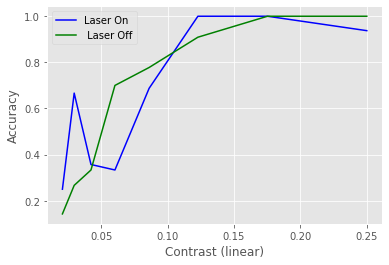

In [45]:
# plot accuracy vs. contrast for laser on for each animal
# plot accuracy vs. contrast for laser off for each animal

animal = 'i2867'
date = '210510'

df = data_df[(data_df.animal==animal) & (data_df.date==date)]

df1 = df[df.block==1]
contrast1 = np.asarray(df1.contrast)
accuracy1 = np.asarray(df1.accuracy) 
#do weibul1 here

df2 = df[df.block==2]
contrast2 = np.asarray(df2.contrast)
accuracy2 = np.asarray(df2.accuracy)


#plot psych points
plt.figure(figsize=np.r_[1.5,1]*4)
ax = plt.gca()

ax.plot(contrast1,accuracy1,color='blue')
ax.plot(contrast2,accuracy2,color='green')

blue_line =  mlines.Line2D([], [], color='blue', label = 'Laser On')
green_line =  mlines.Line2D([], [], color='green', label = ' Laser Off')

plt.legend(handles=[blue_line, green_line])
plt.xlabel('Contrast (linear)')
plt.ylabel('Accuracy')
plt.savefig('fig1.png')

In [30]:
data_df

,animal,date,filename,block,contrast,num_success,num_ignore,num_early,accuracy,laser_power_mw,thresh,thresh_1,thresh_2
0,i2867,210510,/Users/wilsonjok/data-local/Striatum animals/2...,1,0.020764,3,9,7,0.250000,0.10,0.046245,0.046245,0.049799
1,i2867,210510,/Users/wilsonjok/data-local/Striatum animals/2...,1,0.029627,6,3,9,0.666667,0.10,0.046245,0.046245,0.049799
2,i2867,210510,/Users/wilsonjok/data-local/Striatum animals/2...,1,0.042274,5,9,9,0.357143,0.10,0.046245,0.046245,0.049799
3,i2867,210510,/Users/wilsonjok/data-local/Striatum animals/2...,1,0.060317,5,10,7,0.333333,0.10,0.046245,0.046245,0.049799
4,i2867,210510,/Users/wilsonjok/data-local/Striatum animals/2...,1,0.086063,11,5,4,0.687500,0.10,0.046245,0.046245,0.049799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,i2957,220223,/Users/wilsonjok/data-local/Striatum animals/2...,2,0.107495,11,41,17,0.211538,2.51,0.130799,0.172998,0.130799
3160,i2957,220223,/Users/wilsonjok/data-local/Striatum animals/2...,2,0.149298,19,27,10,0.413043,2.51,0.130799,0.172998,0.130799
3161,i2957,220223,/Users/wilsonjok/data-local/Striatum animals/2...,2,0.207359,27,14,13,0.658537,2.51,0.130799,0.172998,0.130799
3162,i2957,220223,/Users/wilsonjok/data-local/Striatum animals/2...,2,0.288000,27,24,21,0.529412,2.51,0.130799,0.172998,0.130799


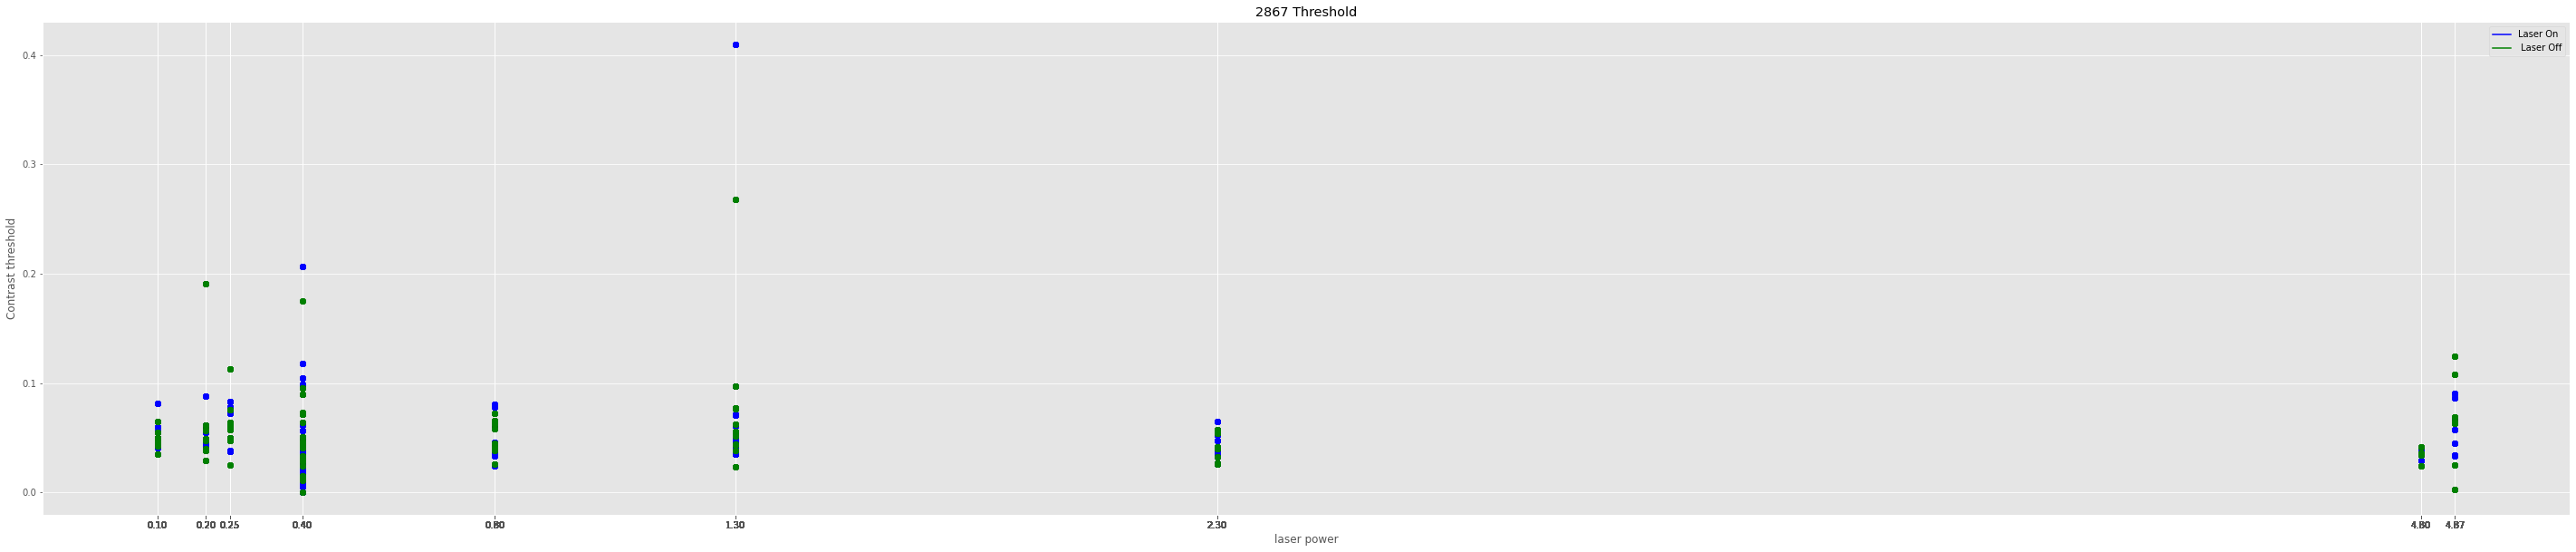

In [65]:
#plot threshold per laser power for one animal
fig,ax = plt.subplots(figsize = (50,10))
ax.scatter(data_df[data_df['animal']=='i2867']['laser_power_mw'], data_df[data_df['animal']=='i2867']['thresh_1'], color='b')
ax.scatter(data_df[data_df['animal']=='i2867']['laser_power_mw'], data_df[data_df['animal']=='i2867']['thresh_2'], color='g')
plt.xticks(data_df[data_df['animal']=='i2867']['laser_power_mw'])
plt.title('2867 Threshold')
plt.ylabel('Contrast threshold')
plt.xlabel('laser power')
blue_line =  mlines.Line2D([], [], color='blue', label = 'Laser On')
green_line =  mlines.Line2D([], [], color='green', label = ' Laser Off')
plt.legend(handles=[blue_line, green_line])
plt.savefig('2867_threshold.png')
#     print(animal)
#     print(laser_power, thresh_1, thresh_2)
    
#        print(date)

        

In [ ]:
np.unique(data_df[data_df['animal']=='i2901']['d'])

In [21]:
np.unique(data_df[da['animal'])

array(['i2867', 'i2901', 'i2955', 'i2957'], dtype=object)

In [ ]:
def _get_data_files(self,animal,start,end):
        animal = animal[:4] # use only number values to search file space in case of animals being split into multiple dataframes
        dir_path = os.path.join(os.getenv('HOME'), 'Documents/MWorksData/Data')
        filestack = sorted(glob.glob(os.path.join(dir_path,'*'+animal+'*.mat')))
        for iF,filename in enumerate(filestack):
        # try to grab.mat data
            try: 
                pre = scipy.io.loadmat(filename, squeeze_me=True)
                matDF =  pre['input']
                df_trial, miscD = _oneBlockFileDataToDf(matDF)
            except: 
                empty.append(np.str(filepath))
            # check if file/session used laser at all
            miscD_color = miscD['laserColor']
            miscD_trial = miscD['trialLaserAOrB']
            laser_power = np.unique(df_trial.tTrialLaserPowerMw)[0]
            if laser_power == 0 or miscD_color not in ['red','blue'] or miscD_trial not in ['A', 'B']:
                continue
                start_file_idx = filestack.index(os.path.join(dir_path,'data2-i'+animal+'-'+start+'.mat'))
                if end != None:
                    end_file_idx = filestack.index(os.path.join(dir_path,'data2-i'+animal+'-'+end+'.mat'))
                    all_files = filestack[start_file_idx:end_file_idx+1]
                else:
                    all_files = filestack[start_file_idx:]
                return (all_files,len(all_files))

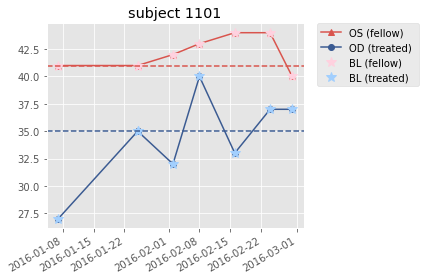

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
import seaborn as sns
from io import StringIO 

data="""index,subject,treated_eye,visit_label,visit_date,bcva_OD,bcva_OS,refract_OD,refract_OS
108, 1101,    OD,  Visit 1 - Screening, 2016-01-07,  27.0,   41.0,    + 5 + 0.75 X 27, + 5 + 1.75 X 45
115, 1101,    OD,  Visit 2 - Baseline,  2016-01-25,  35.0,   41.0,    + 5 + 0.75 X 27, + 5.5 + 1.75 X 40
120, 1101,    OD,  Baseline - VA Session 2 ,2016-01-25, 35.0,   41.0,    + 5 + 0.75 X 27, + 5.5 + 1.75 X 40
125, 1101,    OD,  Visit 4 - Day 1 ,2016-02-02, 32.0,   42.0,    + 5 + 0.75 X 27, + 5 + 1.75 X 30
123, 1101,    OD,  Visit 5 - Day 7 ,2016-02-08, 40.0,   43.0,    + 5 + 0.75 X 28, + 5 + 1.75 X 30
111, 1101,    OD,  Visit 6 - Day 14    ,2016-02-16,33.0,   44.0,    + 5 + 0.75 X 27, + 5 + 1.75 X 40
124, 1101,    OD,  Unscheduled ,2016-02-24, 37.0,   44.0,    + 4.5 + 1.25 X 30,   + 5 + 1.75 X 40
118, 1101,    OD,  Visit 7 - Month 1 ,  2016-02-29 , 37.0,   40.0,    + 4.5 + 1.25 X 30,   + 5 + 1.75 X 43
"""

## DataFrame cleanup
df=pd.read_csv(StringIO(data),sep=",",index_col=0)
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

df['visit_date']=pd.to_datetime(df['visit_date'])

for subject, sub_df in df.groupby(by='subject'):
    mask=(sub_df.visit_label == 'Visit 2 - Baseline')
    bcva_OS_baseline=sub_df['bcva_OS'][mask].values
    bcva_OD_baseline=sub_df['bcva_OD'][mask].values

    fig,ax=plt.subplots()    

    # Plot fellow eye
    ax.plot(sub_df['visit_date'], sub_df['bcva_OS'], marker='^', 
        label='OS (fellow) ', color=sns.xkcd_rgb['pale red'])

    # Plot treated eye
    ax.plot(sub_df['visit_date'], sub_df['bcva_OD'], marker='o',
        label='OD (treated) ', color=sns.xkcd_rgb['denim blue']) 

    # Plot fellow eye
    ax.plot_date(sub_df['visit_date'], sub_df['bcva_OS'], 
        marker='*', markersize=10,
        label='BL (fellow) ', color=sns.xkcd_rgb['light pink'])

    # Plot treated eye
    ax.plot_date(sub_df['visit_date'], sub_df['bcva_OD'], 
        marker='*', markersize=10,
        label='BL (treated) ', color=sns.xkcd_rgb['baby blue'])

    # Plot baseline
    ax.axhline(bcva_OS_baseline,color=sns.xkcd_rgb['pale red'],linestyle="dashed")
    ax.axhline(bcva_OD_baseline,color=sns.xkcd_rgb['denim blue'],linestyle="dashed")

    # Legend the old way
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

    # Display each chart separately
    ax.set_title('subject {0}'.format(subject))
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

In [19]:
df

,subject,treated_eye,visit_label,visit_date,bcva_OD,bcva_OS,refract_OD,refract_OS
index,,,,,,,,
108,1101,OD,Visit 1 - Screening,2016-01-07,27.0,41.0,+ 5 + 0.75 X 27,+ 5 + 1.75 X 45
115,1101,OD,Visit 2 - Baseline,2016-01-25,35.0,41.0,+ 5 + 0.75 X 27,+ 5.5 + 1.75 X 40
120,1101,OD,Baseline - VA Session 2,2016-01-25,35.0,41.0,+ 5 + 0.75 X 27,+ 5.5 + 1.75 X 40
125,1101,OD,Visit 4 - Day 1,2016-02-02,32.0,42.0,+ 5 + 0.75 X 27,+ 5 + 1.75 X 30
123,1101,OD,Visit 5 - Day 7,2016-02-08,40.0,43.0,+ 5 + 0.75 X 28,+ 5 + 1.75 X 30
111,1101,OD,Visit 6 - Day 14,2016-02-16,33.0,44.0,+ 5 + 0.75 X 27,+ 5 + 1.75 X 40
124,1101,OD,Unscheduled,2016-02-24,37.0,44.0,+ 4.5 + 1.25 X 30,+ 5 + 1.75 X 40
118,1101,OD,Visit 7 - Month 1,2016-02-29,37.0,40.0,+ 4.5 + 1.25 X 30,+ 5 + 1.75 X 43
